In [71]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.12.1'

In [72]:
weight = 0.7
bias = 0.3

start = 0 
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

#X[:10], y[:10]

In [73]:
# Split data into training and test sets

train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(40, 10)

In [74]:
def plot_predictions(train_data = X_train, 
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
    """
    PLots training data, test data and compares prediction
    """
    
    plt.figure(figsize=(10,7))
    
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    #Plot test data in green

    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")


    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size":14})

In [75]:
# plot_predictions()

In [76]:
# Build Model 
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
        
    #forward method to define the computation in the model 
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [77]:
# PyTorch model building essentials 

# torch.nn - contains all of the buildings for computational graphs.
# torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will not there for us
# torch.mm.Module - The base class for all neural network modules, we should overite forward().
# torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent.

# def forward() - All nn.Module subclassees require you to overwrite forward(), this method defines what happens in the forward computation

In [78]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

# list(model_0.parameters())

In [79]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [80]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [81]:
# Make prediction with model
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

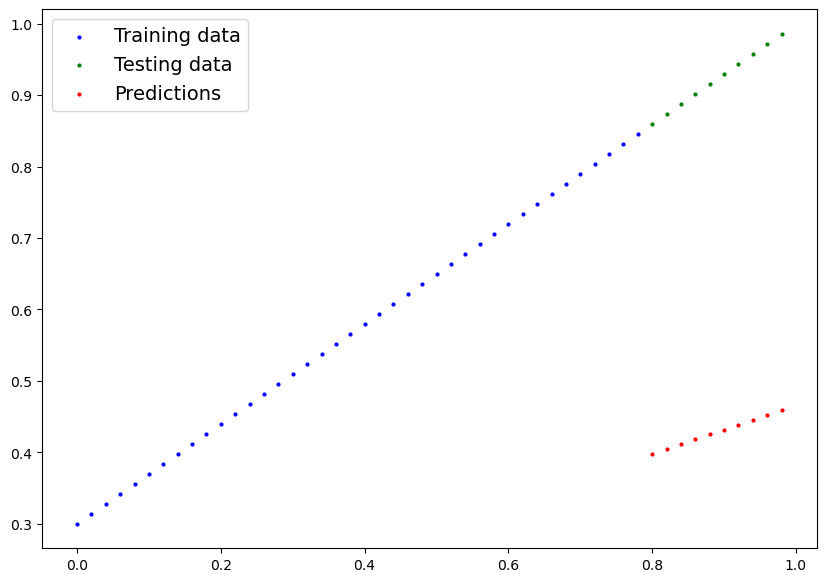

In [82]:
plot_predictions(predictions=y_preds)

## Train Model

Idea of training is for a model to move some *unknow* parameters to parameters working.

- Loss function
- Optimizer

And specifically for PyTorch, we need:
- A training loop
- A testing loop

In [83]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [84]:
# Setup a loss function 
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

optimizer

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Training Loop

1. loop through the data 
2. Forward pass 
3. Calculate the loss
4. Optimizer zero grad
5. Loss backward
6. Optimizer step

In [89]:
# An epoch is one loop through the data... (hyperparameter)
epochs = 1

### Traning
# 0. Loop through the data
for epoch in range(epochs):
    #set the model to training mode 
    model_0.train()
    
    # 1. Forward pass
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred,y_train)
    print(f"Loss: {loss}")
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()
    
    model_0.eval()
    
    print(model_0.state_dict())

Loss: 0.28983935713768005


In [91]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])

In [ ]:
weight, bias